# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision import datasets, transforms, models

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torchvision import datasets, transforms
# Define transforms
## YOUR CODE HERE ##
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(32),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor()])
                 
test_transform = transforms.Compose([transforms.Resize(32),
                                    transforms.CenterCrop(32),
                                    transforms.ToTensor()])

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = datasets.CIFAR10('data', download = True, train = True, transform = train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = datasets.CIFAR10('data', download = True, train = False, transform = test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

bird


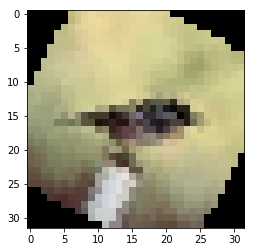

truck


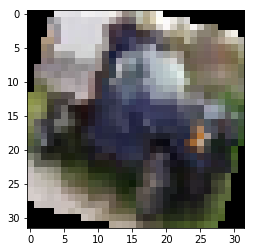

deer


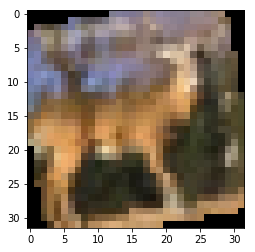

horse


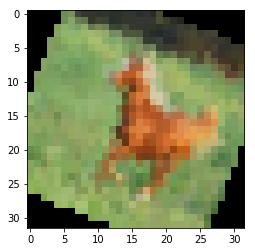

frog


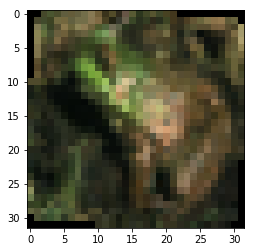

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [4]:
model = models.vgg11_bn(pretrained = True)
model

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.torch/models/vgg11_bn-6002323d.pth
100%|██████████| 531503671/531503671 [00:04<00:00, 110660395.56it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [5]:
## YOUR CODE HERE ##
model.classifier = nn.Sequential(
                           nn.Linear(512, 256),
                          nn.ReLU(),
                        nn.Linear(256, 128),
                            nn.ReLU(),
                            nn.Linear(128, 32),
                            nn.ReLU(),
                          nn.Linear(32, 10),
                          nn.LogSoftmax(dim=1)
                          )
    

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
#model = classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.0003)

In [7]:
model.to('cuda');

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
epochs = 100
steps = 0
print_every = 250
running_loss = 0
train_losses, test_losses = [], []

for e in range(epochs):
    for images, labels in trainloader:
        
        steps += 1
        
        images, labels = images.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        
        output_train = model.forward(images)
        loss = criterion(output_train, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            
            test_loss = 0
            accuracy = 0
            model.eval()
            
            with torch.no_grad():
                for images, labels in testloader:
                    
                    images, labels = images.to('cuda'), labels.to('cuda')
                    
                    output_test = model.forward(images)
                    test_loss += criterion(output_test, labels).item()
                    ps = torch.exp(output_test)
                    top_p, top_class = ps.topk(1, dim = 1)
                    equals = top_class == labels.view(*top_class.shape)
                    
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            print(f"Epoch {e+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/100.. Train loss: 2.090.. Test loss: 1.661.. Test accuracy: 0.409
Epoch 1/100.. Train loss: 1.796.. Test loss: 1.480.. Test accuracy: 0.481
Epoch 1/100.. Train loss: 1.715.. Test loss: 1.429.. Test accuracy: 0.500
Epoch 2/100.. Train loss: 1.686.. Test loss: 1.415.. Test accuracy: 0.500
Epoch 2/100.. Train loss: 1.674.. Test loss: 1.391.. Test accuracy: 0.517
Epoch 2/100.. Train loss: 1.657.. Test loss: 1.355.. Test accuracy: 0.523
Epoch 3/100.. Train loss: 1.636.. Test loss: 1.321.. Test accuracy: 0.535
Epoch 3/100.. Train loss: 1.629.. Test loss: 1.331.. Test accuracy: 0.536
Epoch 3/100.. Train loss: 1.624.. Test loss: 1.323.. Test accuracy: 0.538
Epoch 4/100.. Train loss: 1.608.. Test loss: 1.301.. Test accuracy: 0.541
Epoch 4/100.. Train loss: 1.613.. Test loss: 1.312.. Test accuracy: 0.546
Epoch 4/100.. Train loss: 1.602.. Test loss: 1.268.. Test accuracy: 0.551
Epoch 5/100.. Train loss: 1.592.. Test loss: 1.281.. Test accuracy: 0.539
Epoch 5/100.. Train loss: 1.584.. Test

Plot the training loss (and validation loss/accuracy, if recorded).

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

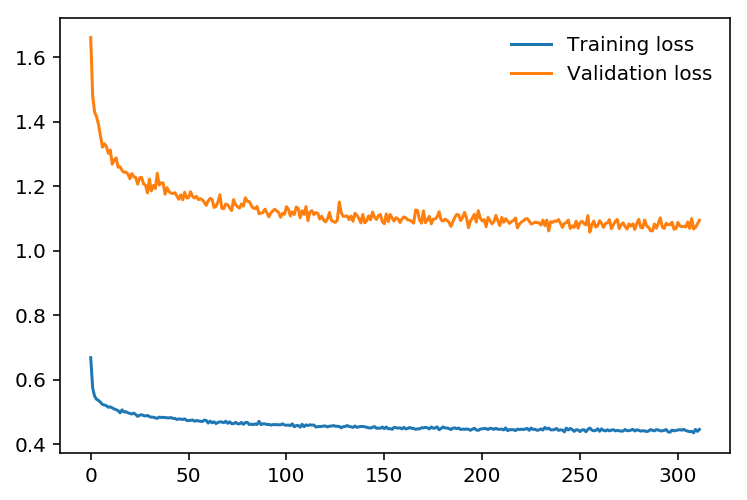

In [10]:
## YOUR CODE HERE ##
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
model.eval();
accuracy = 0
    
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        output=model(images)        
        # Calculate accuracy
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
print(f"Model accuracy on the test set: {accuracy*100/len(testloader):.4f}")
model.train();

Model accuracy on the test set: 62.6493


## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'Checkpoint.pth')

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?

after building this model I think if the company I am working for have time for me to make the AI model I could come very close if not beat Detectocorp's model in a matter of almost 16 hours of work my model got a 62.65% accuracy on the test set which is good. If the company I am working for needs the model ASAP and needs it to be as accurate as possible I would recommend Detectocorp's model if there is some time availabe I belive that my model will get really close to theirs.

what I did here was that I used transfare learning. I used the vgg11_bn model and added a classifier to it as it is defined in the code cell above. regarding the learning rate it was a process of trial and error plus searching for the best range of learning rate on google to make sure I was making progress.

## Submit Your Project

When you are finished editing the notebook and are ready to turn it in, simply click the **SUBMIT PROJECT** button in the lower right.

Once you submit your project, we'll review your work and give you feedback if there's anything that you need to work on. If you'd like to see the exact points that your reviewer will check for when looking at your work, you can have a look over the project [rubric](https://review.udacity.com/#!/rubrics/3077/view).